In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
estate = pd.read_csv("Real_Estate.csv")
estate.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [3]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [4]:
estate.describe().T

,count,mean,std,min,25%,50%,75%,max
House age,414.0,18.405072,11.757670,0.000000,9.900000,16.450000,30.375000,42.700000
Distance to the nearest MRT station,414.0,1064.468233,1196.749385,23.382840,289.324800,506.114400,1454.279000,6306.153000
Number of convenience stores,414.0,4.265700,2.880498,0.000000,2.000000,5.000000,6.750000,10.000000
Latitude,414.0,24.973605,0.024178,24.932075,24.952422,24.974353,24.994947,25.014578
Longitude,414.0,121.520268,0.026989,121.473888,121.496866,121.520912,121.544676,121.565321
House price of unit area,414.0,29.102149,15.750935,0.000000,18.422493,30.394070,40.615184,65.571716


In [5]:
estate.count()

Transaction date                       414
House age                              414
Distance to the nearest MRT station    414
Number of convenience stores           414
Latitude                               414
Longitude                              414
House price of unit area               414
dtype: int64

In [6]:
estate.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

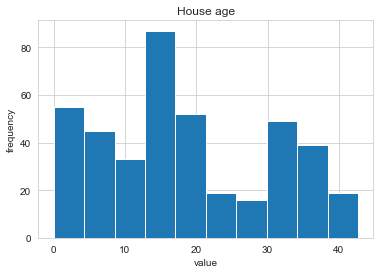

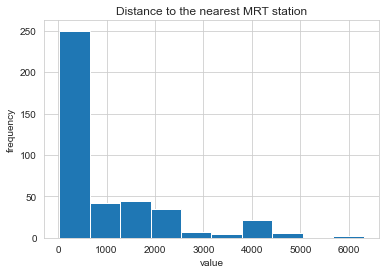

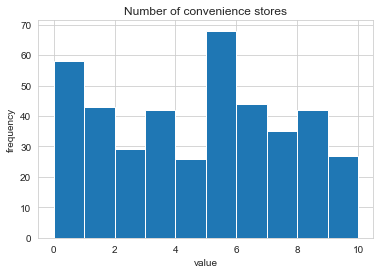

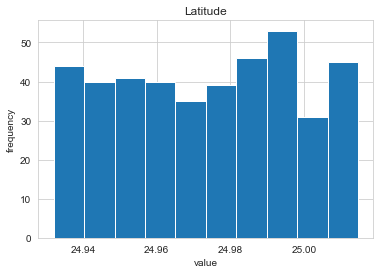

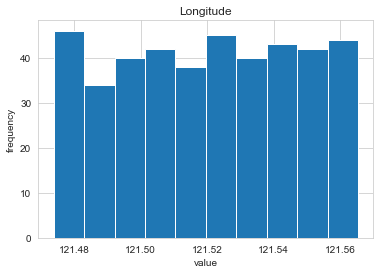

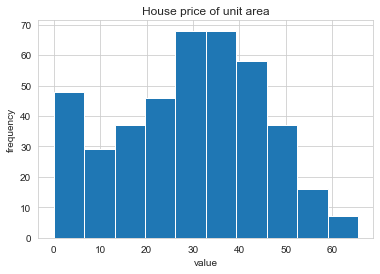

In [7]:
#showing the relationships between the numerical values

#creating the aesthetic for the plot
sns.set_style("whitegrid")

#his to show relationship
num_cols = estate.select_dtypes(include=[np.number])
for col in num_cols.columns:
    plt.hist(estate[col], bins=10)
    plt.title(col)
    plt.xlabel("value")
    plt.ylabel("frequency")
    plt.show()

House age:  house age has an average rate, new houses appears to have slight high price, and those on average age
    
distance: the distance shows strong negative correlations, the less the distance, the higher the price
    
stores: houses or locality with social amenities tends to affect house price
    


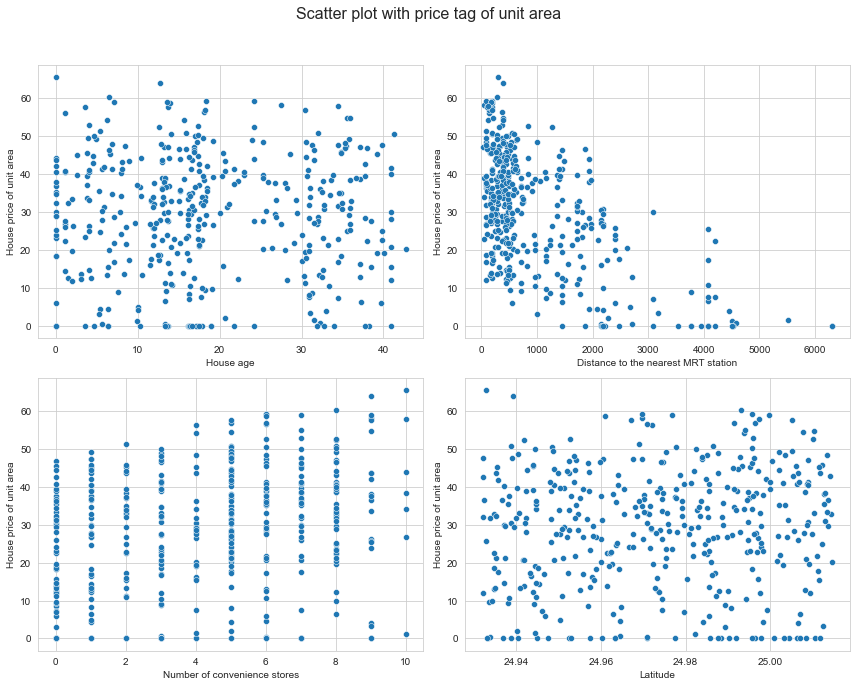

In [8]:
#scatter plot to visualize the relationship

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.suptitle("Scatter plot with price tag of unit area", fontsize=16)

sns.scatterplot(data=estate, x="House age", y="House price of unit area", ax=axes[0,0])
sns.scatterplot(data=estate, x="Distance to the nearest MRT station", y="House price of unit area", ax=axes[0,1])
sns.scatterplot(data=estate, x="Number of convenience stores", y="House price of unit area", ax=axes[1,0])
sns.scatterplot(data=estate, x="Latitude", y="House price of unit area", ax=axes[1,1])

plt.tight_layout(rect = [0, 0.03,1, 0.95])
plt.show()

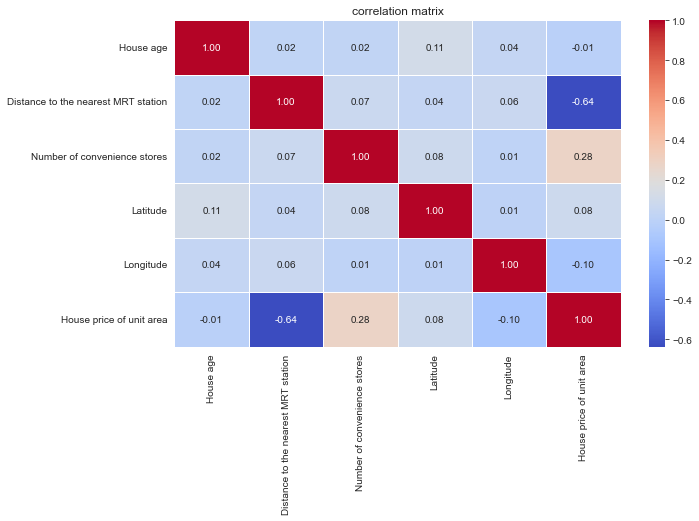

In [9]:
#correlation

corr_matrix = estate.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm", linewidths= .5, fmt = ".2f" )
plt.title("correlation matrix")
plt.show()

In [10]:
# lets dive into the predictions

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [11]:
#select features
features = ["House age", "Distance to the nearest MRT station", 'Number of convenience stores', "Latitude"]
target = ["House price of unit area"]

X = estate[features]
y= estate[target]

#train the model
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.2, random_state=42)

#model definition
model = LinearRegression()

#fit the model
model.fit(X_train, y_train)

LinearRegression()

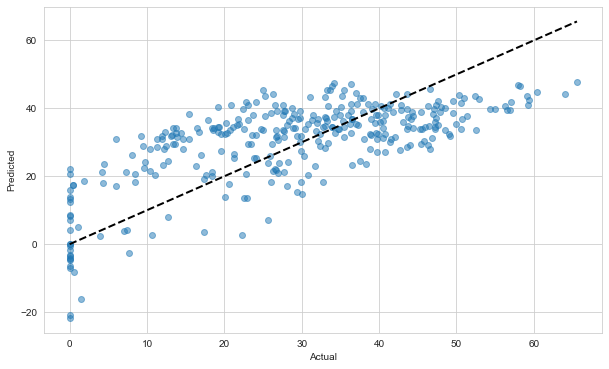

In [17]:
#making prediction using the linear regression model

y_pred = model.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max() ], "k--", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(mae)
print(mse)

9.606457723474636
128.6923902951593
